## **Crypto price 🪙 visualization 📈 using historical [CoinMarketCap](https://coinmarketcap.com/) data**


Analyzing [Bitcoin](https://coinmarketcap.com/currencies/bitcoin/) and [Ether](https://coinmarketcap.com/currencies/ethereum/) prices using R programming.

**Import all necessary library**

In [ ]:
install.packages("plyr")
install.packages("ggplot2")
install.packages("dplyr")
install.packages("reshape2")

In [134]:
#required libraries for the stacked area chart
library("ggplot2") # visualization
library("dplyr") # data manipulation
library("plyr")
library("reshape2") # data transformation. For instance from wide to long format

**Importing the data**

In [135]:
# btc historical prices
BTC_price = read.csv("BTC_All_graph_coinmarketcap.csv", sep=";")
# eth historical prices
ETH_price = read.csv("ETH_All_graph_coinmarketcap.csv", sep=";")

In [136]:
# converting the columns to timestamp and drop the original to avoid duplicate
# BTC
BTC_price$date  <- as.Date(BTC_price$timestamp,
                                   format = "%Y-%m-%d")
BTC_price  <- BTC_price[, -8]


#ETH
ETH_price$date  <- as.Date(ETH_price$timestamp,
                                   format = "%Y-%m-%d")
ETH_price  <- ETH_price[, -8]

**Explore the first 5 rows of the dataset**

In [137]:
head(BTC_price)

,name,open,high,low,close,volume,marketCap,date
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1,2781,135.300,147.488,132.100,139.000,0,1542813125,2013-04-01
2,2781,139.000,139.890,79.100,129.000,0,1447870200,2013-05-01
3,2781,128.815,129.780,88.500,96.614,0,1096957771,2013-06-01
4,2781,97.510,111.344,65.526,106.090,0,1218777834,2013-07-01
5,2781,106.213,140.890,101.211,135.350,0,1574672051,2013-08-01
6,2781,135.140,146.500,118.460,133.000,0,1566038425,2013-09-01


In [138]:
head(ETH_price)

,name,open,high,low,close,volume,marketCap,date
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1,2781,1.353480,1.39274,0.557062,0.738644,619926,54351468,2015-09-01
2,2781,0.734307,1.34505,0.420897,0.916627,673892,68163368,2015-10-01
3,2781,0.920847,1.10642,0.725665,0.873119,784439,65589555,2015-11-01
4,2781,0.878316,1.04537,0.770488,0.933542,663994,70858023,2015-12-01
5,2781,0.933712,2.83699,0.929835,2.306040,5847500,176834424,2016-01-01
6,2781,2.319690,6.64741,2.116310,6.336990,7648020,490556570,2016-02-01


### **Bitcoin summary statistics and viz**

In [140]:
# summary statistics of the BTC's closing prices
summary(BTC_price[['close']])

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
   96.61   597.98  7193.60 14964.80 24634.18 71333.65 

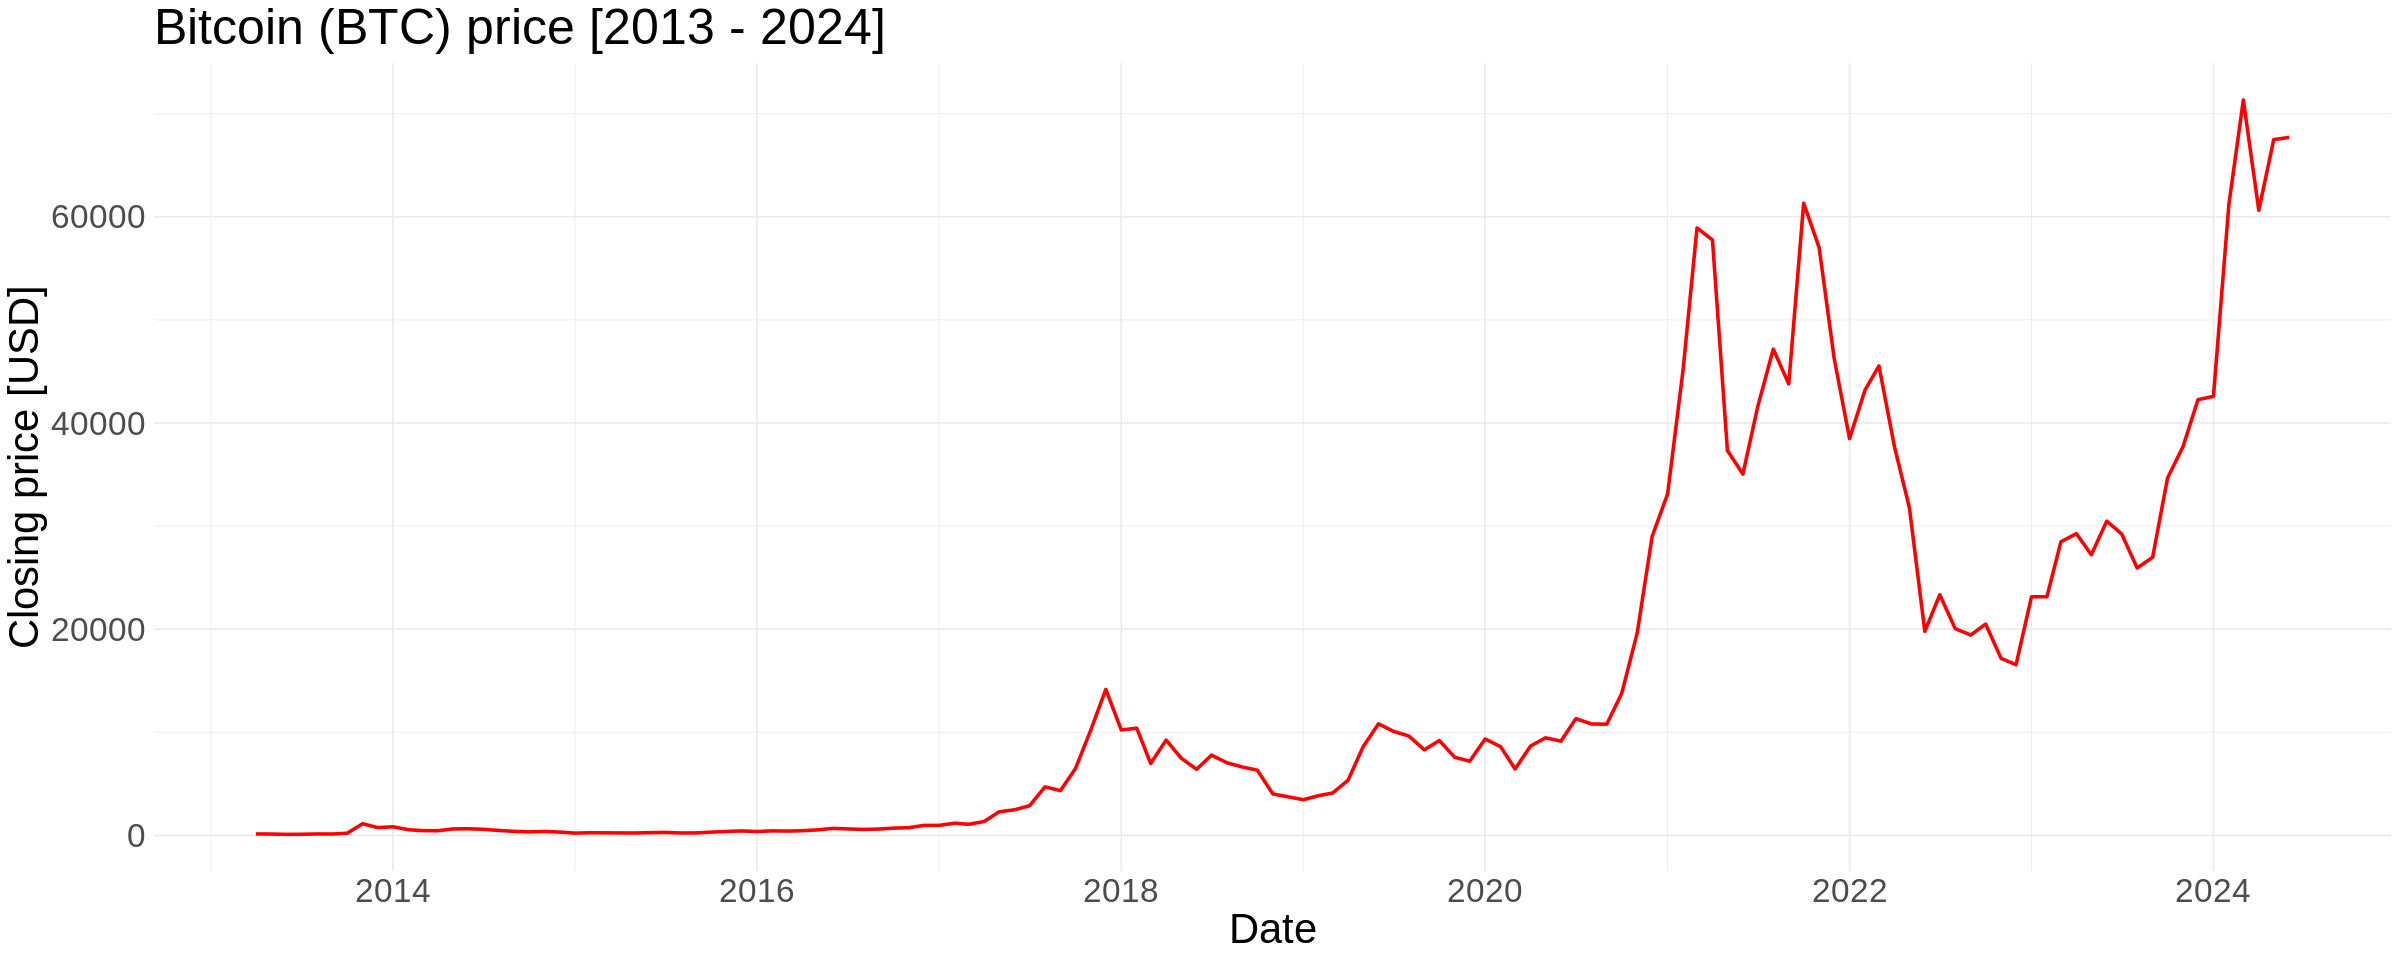

In [157]:
# line chart for BITCOIN 🪙

# set size
options(repr.plot.width = 20, repr.plot.height =8)

# plot the price
ggplot(BTC_price, aes(x = date, y = close)) +
  geom_line(size = 1,  colour = "red") +
  theme_minimal() + theme(text = element_text(size=25)) +
  ggtitle("Bitcoin (BTC) price [2013 - 2024]") + ylab("Closing price [USD]") + xlab("Date")

### **ETHER summary statistics and viz**

In [142]:
# summary statistics of the ETH's closing prices
summary(ETH_price['close'])

     close         
 Min.   :   0.739  
 1st Qu.: 144.270  
 Median : 399.551  
 Mean   :1075.221  
 3rd Qu.:1847.627  
 Max.   :4631.479  

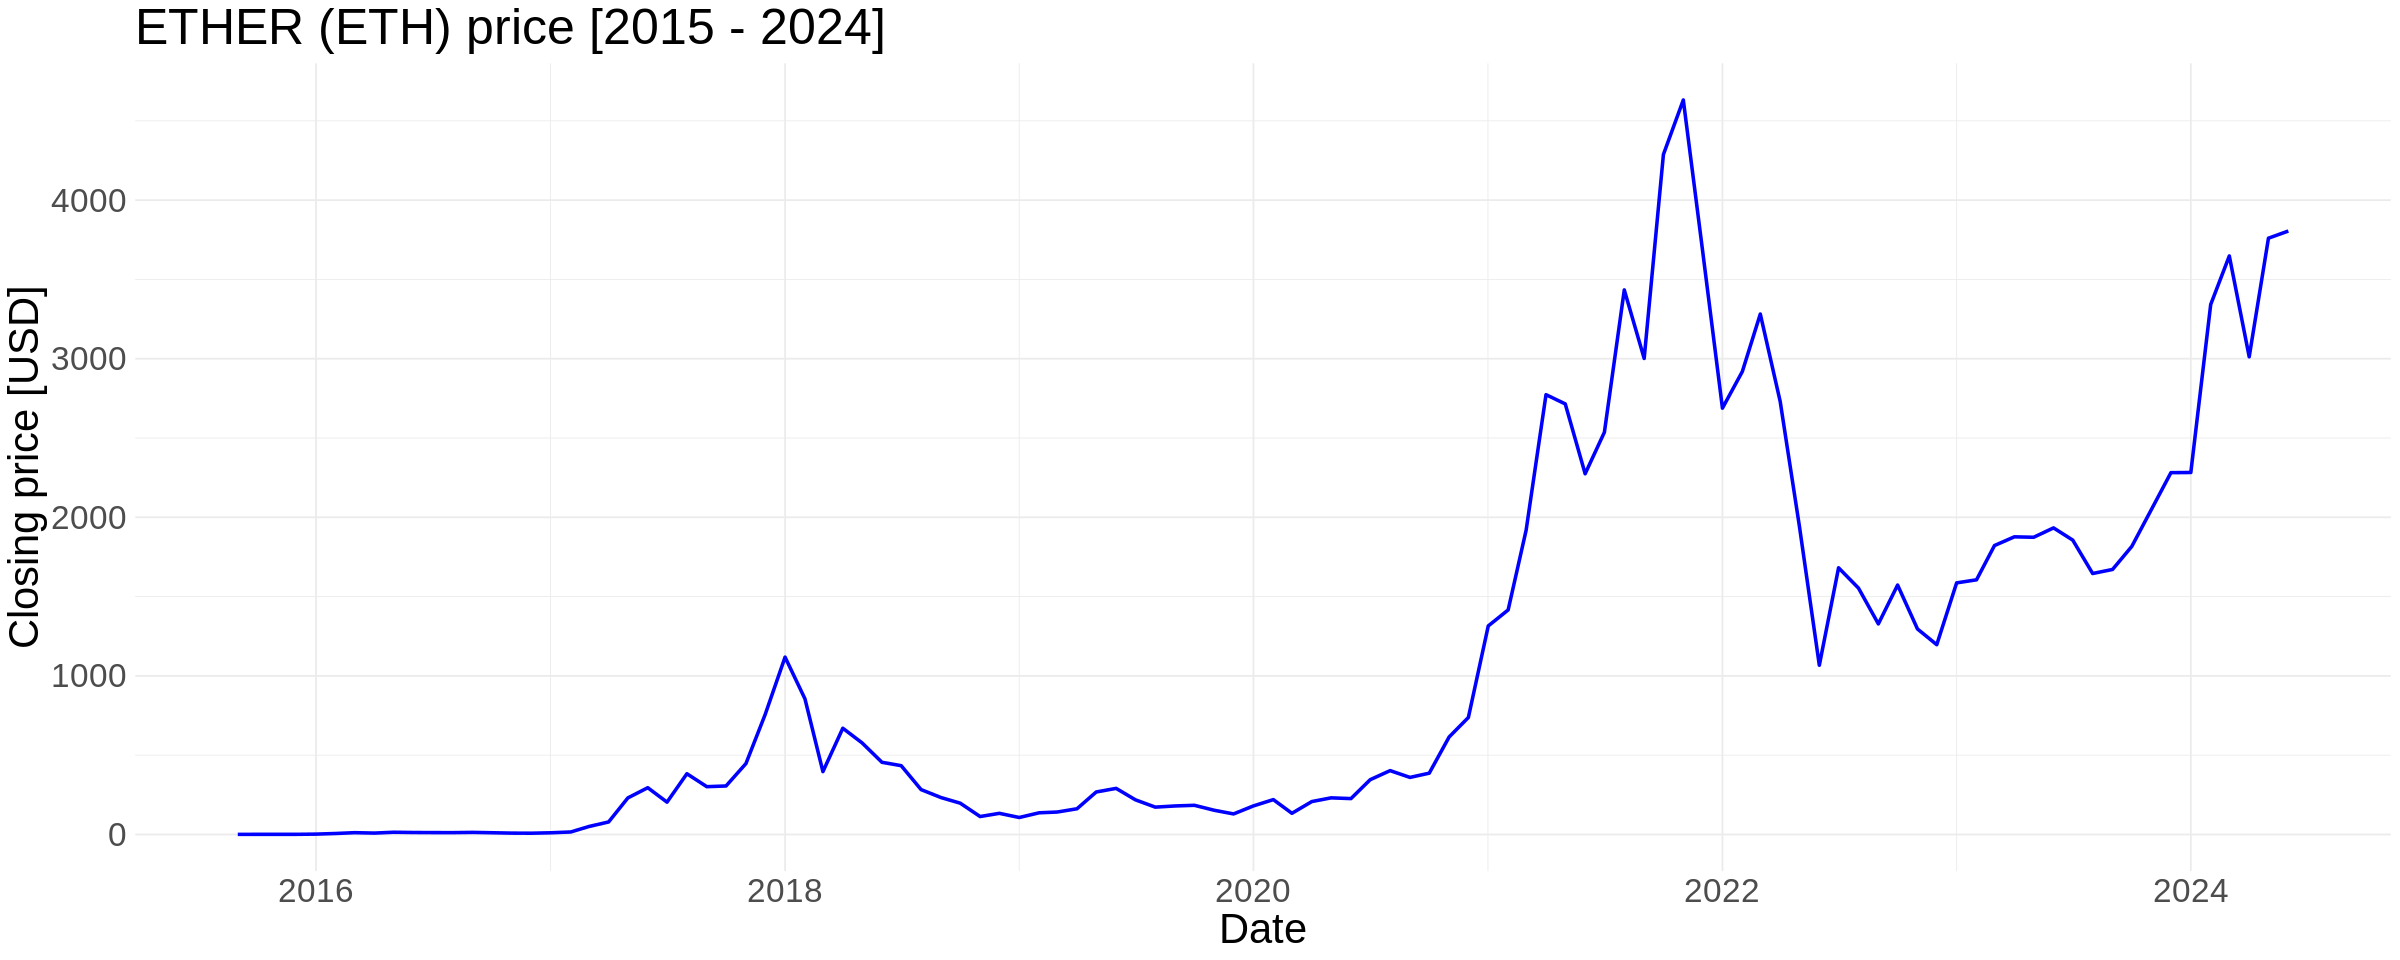

In [156]:
# line chart for ETHER 🪙

# set size
options(repr.plot.width = 20, repr.plot.height =8)

# plot the price
ggplot(ETH_price, aes(x = date, y = close)) +
  geom_line(size = 1,  colour = "blue") +
  theme_minimal() + theme(text = element_text(size=25)) +
  ggtitle("ETHER (ETH) price [2015 - 2024]") + ylab("Closing price [USD]") + xlab("Date")

### **Calculate simple returns for Bitcoin**

In [145]:
# formula to calculate the rate of return
BTC_prices <- BTC_price[, "close", drop = FALSE]

# Denote n the number of time periods:
n <- nrow(BTC_prices)

BTC_simple_return <- ((BTC_prices[2:n, 1] - BTC_prices[1:(n-1), 1])/BTC_prices[1:(n-1), 1])

# print the returns
BTC_simple_return[1:10]

[1] -0.07194245 -0.25105428  0.09808100  0.27580366 -0.01736244  0.53383459
 [7]  4.53642183 -0.33239778  0.10067502 -0.33817715

In [146]:
# summary statistics on the rate of returns
summary(BTC_simple_return)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.37769 -0.07846  0.02597  0.09054  0.18768  4.53642 

In [147]:
# create columns
dates = BTC_price[2:135,8]
returns = BTC_simple_return

# create a new dataframe, add dates and returns as columns
simple_return_df <- data.frame(date = dates, return = returns)
head(simple_return_df)

,date,return
,<date>,<dbl>
1,2013-05-01,-0.07194245
2,2013-06-01,-0.25105428
3,2013-07-01,0.09808100
4,2013-08-01,0.27580366
5,2013-09-01,-0.01736244
6,2013-10-01,0.53383459


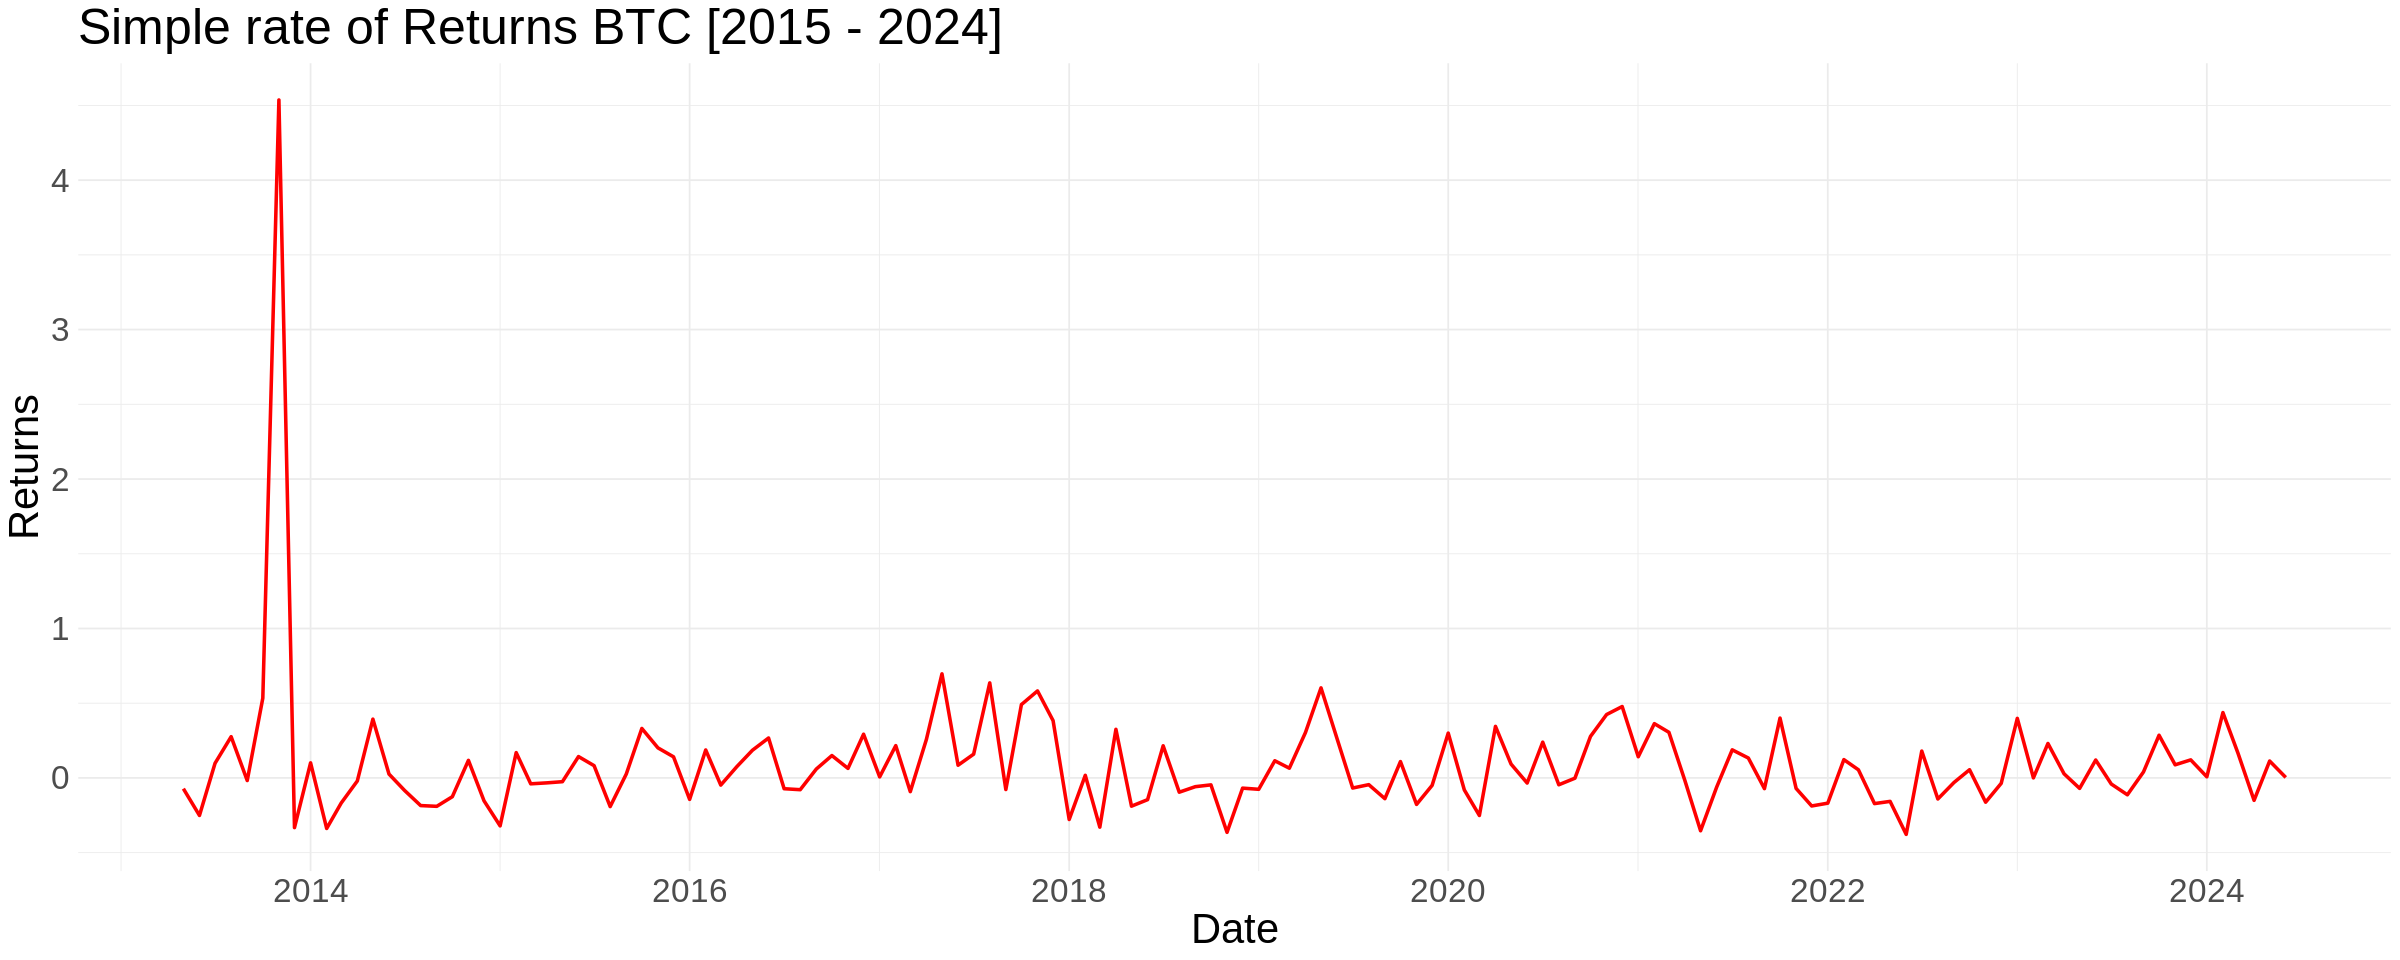

In [155]:
# visualize the rate of return for BITCOIN 🪙

# set size
options(repr.plot.width = 20, repr.plot.height =8)

# plot the price
ggplot(simple_return_df, aes(x = date, y = return)) +
  geom_line(size = 1, colour = "red") +
  theme_minimal() + theme(text = element_text(size=25)) +
  ggtitle("Simple rate of Returns BTC [2015 - 2024]") + ylab("Returns") + xlab("Date")

### **Calculate simple returns for Ether**

In [149]:
# formula to calculate the rate of return
ETH_prices <- ETH_price[, "close", drop = FALSE]

# Denote n the number of time periods:
n <- nrow(ETH_prices)

ETH_simple_return <- ((ETH_prices[2:n, 1] - ETH_prices[1:(n-1), 1])/ETH_prices[1:(n-1), 1])

# print the returns
ETH_simple_return[1:10]

[1]  0.24095909 -0.04746532  0.06920364  1.47020489  1.74799646  0.79951362
 [7] -0.22708112  0.59715587 -0.11478053 -0.04699273

In [150]:
# summary statistics on the rate of returns
summary(ETH_simple_return)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.53642 -0.14527  0.04292  0.15154  0.32568  2.16347 

In [151]:
# create columns
dates = ETH_price[2:nrow(ETH_price),8]
returns = ETH_simple_return

# create a new dataframe, add dates and returns as columns
ETH_simple_return_df <- data.frame(date = dates, returns = returns)
head(ETH_simple_return_df)

,date,returns
,<date>,<dbl>
1,2015-10-01,0.24095909
2,2015-11-01,-0.04746532
3,2015-12-01,0.06920364
4,2016-01-01,1.47020489
5,2016-02-01,1.74799646
6,2016-03-01,0.79951362


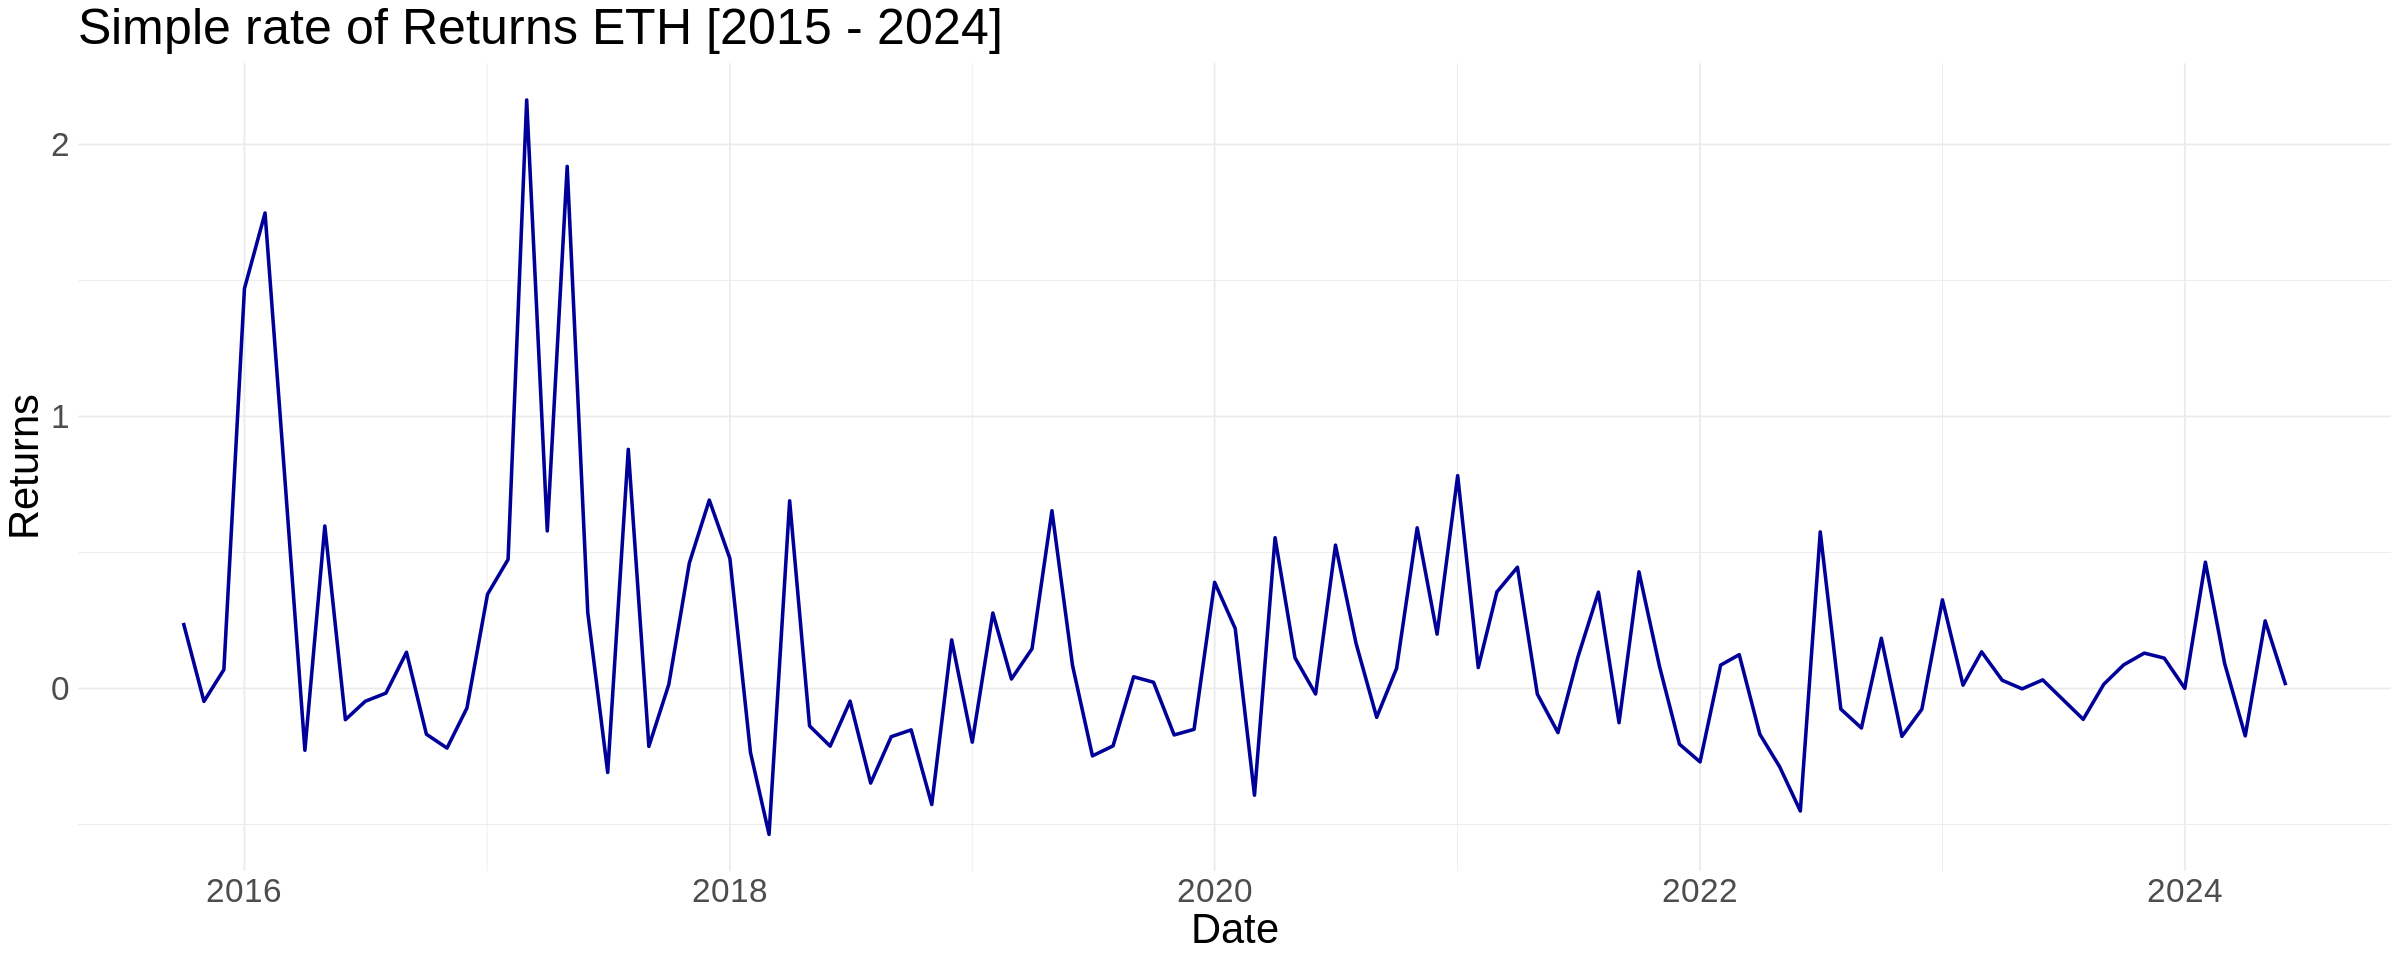

In [154]:
# visualize the rate of return for ETHER 🪙

# set size
options(repr.plot.width = 20, repr.plot.height =8)

# plot the price
ggplot(ETH_simple_return_df, aes(x = date, y = returns)) +
  geom_line(size = 1, colour="#000099") +
  theme_minimal() + theme(text = element_text(size=25)) +
  ggtitle("Simple rate of Returns ETH [2015 - 2024]") + ylab("Returns") + xlab("Date")